# || The Sparks Foundation || GRIPFEB21
### NAME: Susanto Mahato
### Task 2: Implement Image color detector which identifies all the colors in an image

### Color Detection in Image

In [1]:
# import libraries
import numpy as np
import pandas as pd
import cv2 as cv
import matplotlib.pyplot as plt
import imutils

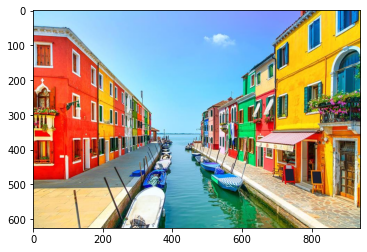

In [2]:
# Read Image
img = cv.imread("C:\\Users\\susan\\Downloads\\italy.jpg")
image = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Show image
plt.imshow(image)

In [3]:
# Load colors
colors = "C:\\Users\\susan\\Downloads\\color\\colors.csv"

# Reading csv file with pandas and giving names to each column
index = ["Color", "Color_Name", "Hex", "R", "G", "B"]
csv = pd.read_csv(colors, names=index, header=None)

In [4]:
# Show dataset
csv.head()

,Color,Color_Name,Hex,R,G,B
0,air_force_blue_raf,Air Force Blue (Raf),#5d8aa8,93,138,168
1,air_force_blue_usaf,Air Force Blue (Usaf),#00308f,0,48,143
2,air_superiority_blue,Air Superiority Blue,#72a0c1,114,160,193
3,alabama_crimson,Alabama Crimson,#a32638,163,38,56
4,alice_blue,Alice Blue,#f0f8ff,240,248,255


In [5]:
clicked = False
r = g = b = xpos = ypos = 0

In [6]:
# Mouse click function
def mouse_click(event, x, y, flags, param):
    if event == cv.EVENT_LBUTTONDBLCLK:
        global b, g, r, xpos, ypos, clicked
        clicked = True
        xpos = x
        ypos = y
        b,g,r = img[y,x]
        b = int(b)
        g = int(g)
        r = int(r)

In [7]:
# Color Identification function
def identify_color(R,G,B):
    minimum = 10000
    for i in range(len(csv)):
        
        # Distance Formula:
        # d = abs(Red - ithRedColor) + abs(Green - ithGreenColor) + abs(Blue - ithBlueColor)
        
        d = abs(R - int(csv.loc[i, "R"])) + abs(G - int(csv.loc[i, "G"])) + abs(B - int(csv.loc[i, "B"]))
        if (d<=minimum):
            minimum = d
            cname = csv.loc[i, "Color_Name"]
    return cname

In [8]:
# Output window and callback function which will be called when a mouse event takes place
cv.namedWindow("Color Detection")
cv.setMouseCallback("Color Detection", mouse_click)

# Display image
while(1):
    cv.imshow("Color Detection", img)
    if (clicked):
        
        # cv.rectangle(image, startpoint, endpoint, color, thickness)
        # -1 thickness filss the entire block
        cv.rectangle(img, (10,10), (920,50), (b,g,r), -1)
        
        # Creating text string to display (Color Name and RGB values)
        text = identify_color(r,g,b) + " R = " + str(r) + " G = " + str(g) + " B = " +str(b)
        
        # cv.putText(image, text, start, font(0-7), fontScale, color, thickness, LineType)
        cv. putText(img, text, (40,40), 2, 0.8, (255,255,255), 2, cv.LINE_AA)
        
        # For very light colors display text in black
        if (r+g+b)>=600:
            cv.putText(img, text, (40,40), 2, 0.8, (0,0,0), 2, cv.LINE_AA)
            
        clicked = False
        
    # Break loop when pressed "esc"
    if cv.waitKey(20) & 0xFF == 27:
        break
        
cv.destroyAllWindows()